In [40]:
#Importing Required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
sns.set_palette("bwr")
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [41]:
#importing csv datafile and displaying top 5 rows
df=pd.read_csv("diabetes_data.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [42]:
#Pre-Processing the data
#Converting all stirng to lower case,removing extra space,replacing empty space between words with underscore
#Replacing Yes,Positive with 1 and No,Female with 0.
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.strip()
zeroValues = ["Female", "Negative", "No"]
oneValues = ["Male", "Positive", "Yes"]


for column in df.columns:
    df[column] = df[column].replace(to_replace=[zeroValues], value=0)
    df[column] = df[column].replace(to_replace=[oneValues], value=1)

In [43]:
#Renaming class to status and displaying top 5 rows after preporcessing.
df = df.rename({"class": "status"},axis="columns")
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,status
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [44]:
from sklearn.model_selection import train_test_split

x = df[df.columns.drop("status")]
y = df["status"]

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.25, random_state=1)

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

nb = GaussianNB()
lr = LogisticRegression(max_iter = 2000)
dt = tree.DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
svc = SVC(probability = True)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state =1,eval_metric='logloss')
vot = VotingClassifier(
    estimators = [('nb',nb), ('lr',lr), ('dt',dt), ('rf',rf), ('svc',svc), ('knn',knn), ('xgb',xgb)],
    voting = 'soft'
)
models = [nb, lr, dt, rf, svc, knn, xgb, vot]
models_name = [
    "Naive Bayes",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "SVM",
    "K-Nearest Neighbor",
    "XGBoost",
    "Voting"
]

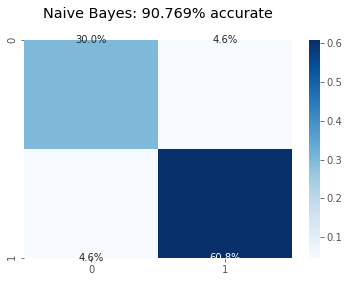

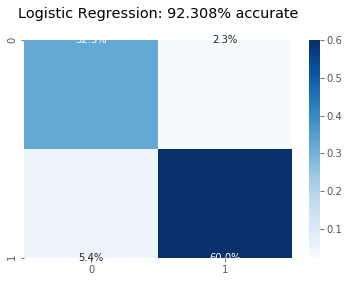

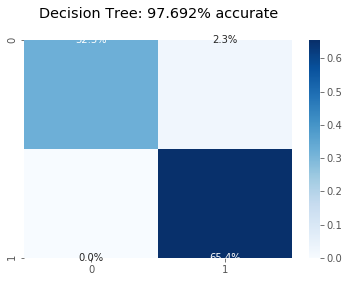

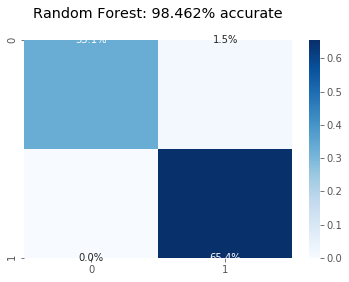

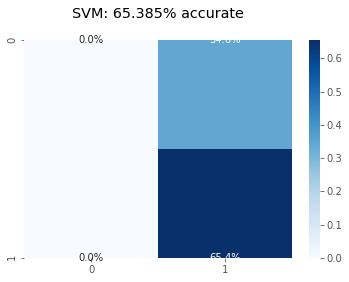

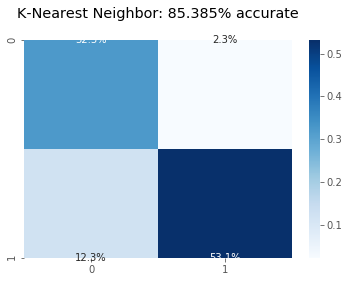

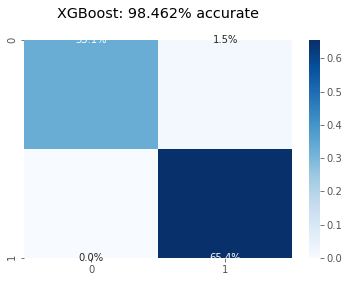

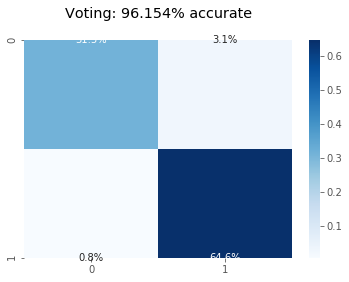

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,roc_auc_score

results = {}

for index, model in enumerate(models):
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    confuse = confusion_matrix(y_test, predict)
    
    accur = accuracy_score(y_test, predict)
    results[models_name[index]] = accur * 100.0
    
    title = models_name[index] + ": " + "{:.3f}%".format(accur*100) + " accurate\n"
    ax = sns.heatmap(confuse/np.sum(confuse), annot=True, fmt='.1%', cmap="Blues")
    ax.set_title(title)
    plt.show()
    

In [47]:
import warnings
warnings.filterwarnings("ignore")
results_base = {}

for index, model in enumerate(models):
    cv = cross_val_score(model, x_train, y_train, cv=10)
    results_base[models_name[index]] = cv.mean() * 100.0
    print("Cross Validation Score of", models_name[index], "=", cv.mean() * 100.0, "%", "and std:", cv.std())

Cross Validation Score of Naive Bayes = 88.20512820512822 % and std: 0.059804634818926165
Cross Validation Score of Logistic Regression = 92.05128205128206 % and std: 0.06116338688141825
Cross Validation Score of Decision Tree = 96.15384615384615 % and std: 0.03087588353536485
Cross Validation Score of Random Forest = 98.2051282051282 % and std: 0.023076923076923068
Cross Validation Score of SVM = 60.256410256410255 % and std: 0.01282051282051283
Cross Validation Score of K-Nearest Neighbor = 86.41025641025641 % and std: 0.056235159485798235
Cross Validation Score of XGBoost = 97.43589743589745 % and std: 0.03033887068256213
Cross Validation Score of Voting = 97.17948717948718 % and std: 0.024189695210401544


In [52]:
for index, model in enumerate(models):
    predict = model.predict(x_test)       
    report = classification_report(y_test,predict)
    print(models_name[index],":-")
    print(report)
    print('ROC AUC : ' ,roc_auc_score(y_test,predict))
 

Naive Bayes :-
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.93      0.93      0.93        85

    accuracy                           0.91       130
   macro avg       0.90      0.90      0.90       130
weighted avg       0.91      0.91      0.91       130

ROC AUC :  0.8980392156862746
Logistic Regression :-
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        45
           1       0.96      0.92      0.94        85

    accuracy                           0.92       130
   macro avg       0.91      0.93      0.92       130
weighted avg       0.93      0.92      0.92       130

ROC AUC :  0.9254901960784314
Decision Tree :-
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.97      1.00      0.98        85

    accuracy                           0.98       130
   macro avg 

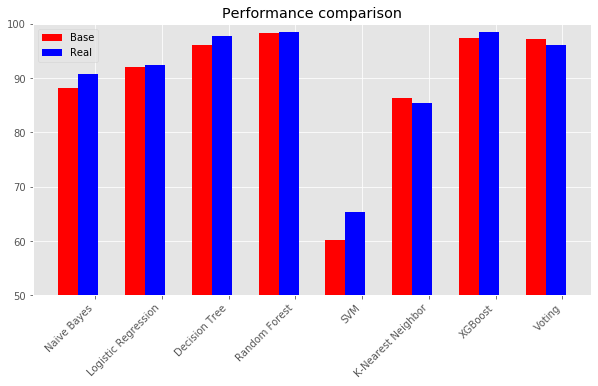

In [49]:
x = np.arange(len(results))

plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.bar(x, results_base.values(), width=0.3, color="red", align="center")
ax.bar(x+0.3, results.values(), width=0.3, color="blue", align="center")
ax.legend(("Base", "Real"))
plt.ylim((50, 100))
plt.xticks(x+0.4, results_base.keys())
plt.title("Performance comparison")
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()


,0
age,0.099114
gender,0.081513
polyuria,0.229136
polydipsia,0.194240
sudden_weight_loss,0.061460
weakness,0.019150
polyphagia,0.037936
genital_thrush,0.021823
visual_blurring,0.032601
itching,0.028977


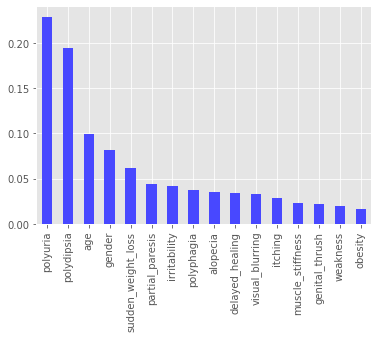

In [50]:
feature_importances = pd.Series(rf.feature_importances_, index=df.columns.drop("status"))
feature_importances.nlargest(20).plot(kind='bar')
feature_importances.to_frame()

age
gender
polyuria
polydipsia
sudden_weight_loss
weakness
polyphagia
genital_thrush
visual_blurring
itching
irritability
delayed_healing
partial_paresis
muscle_stiffness
alopecia
obesity


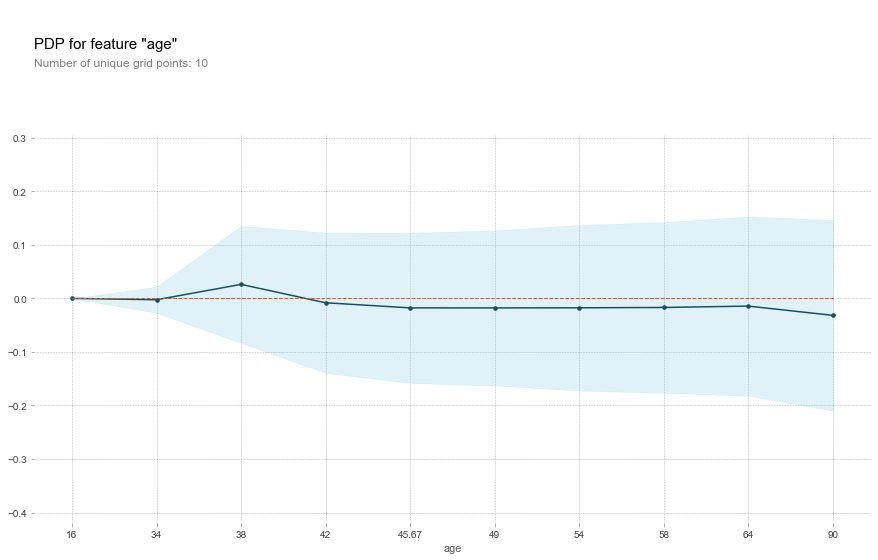

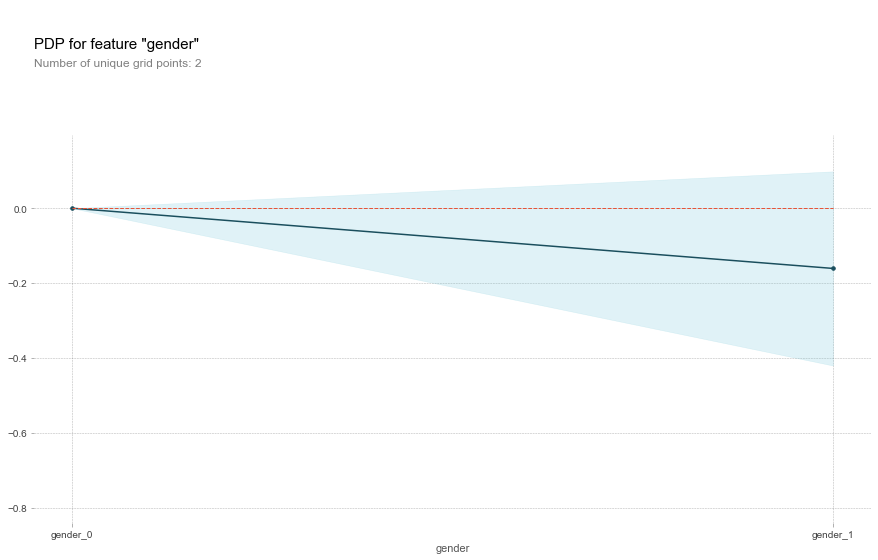

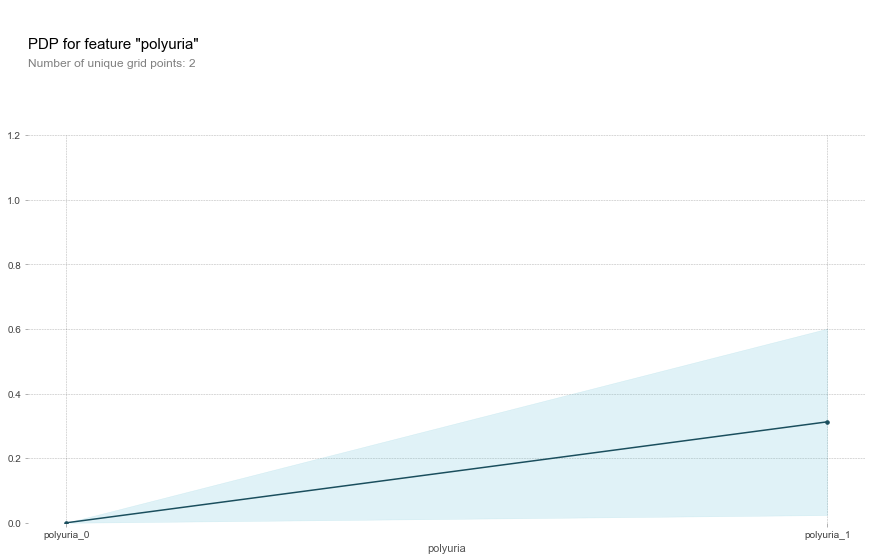

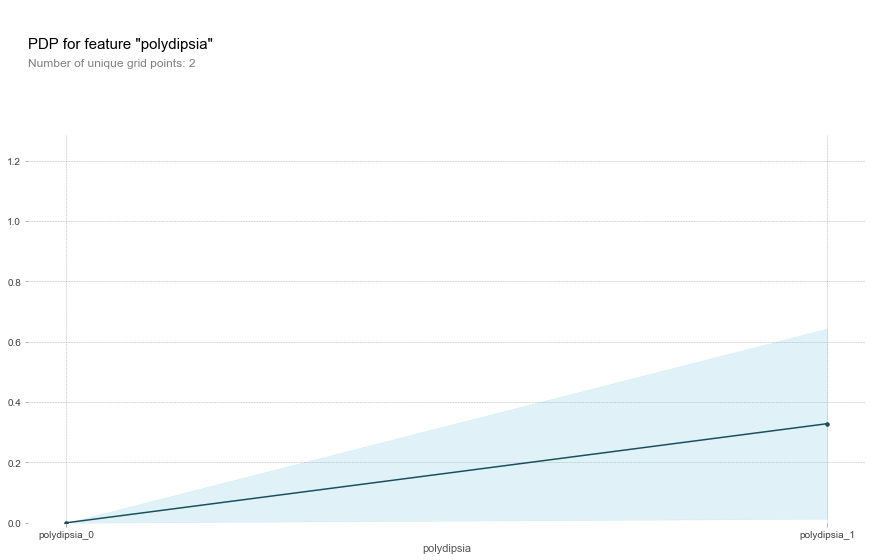

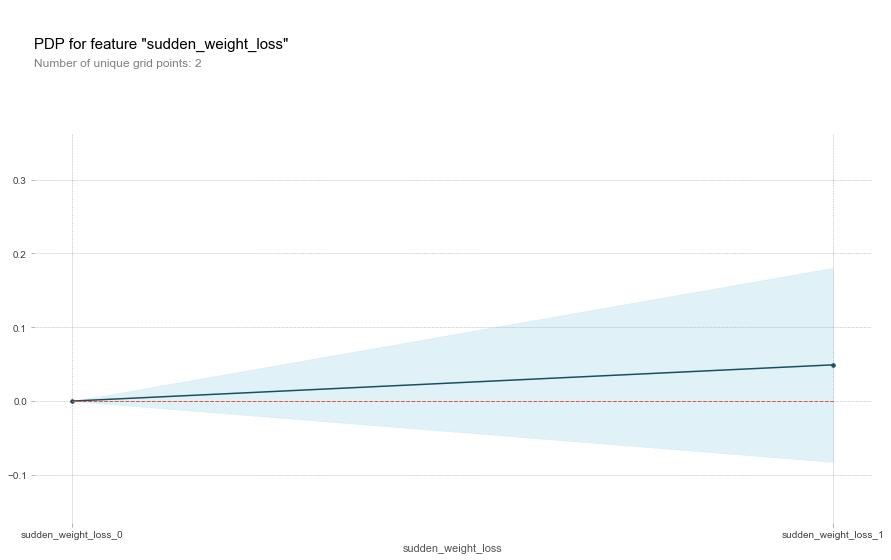

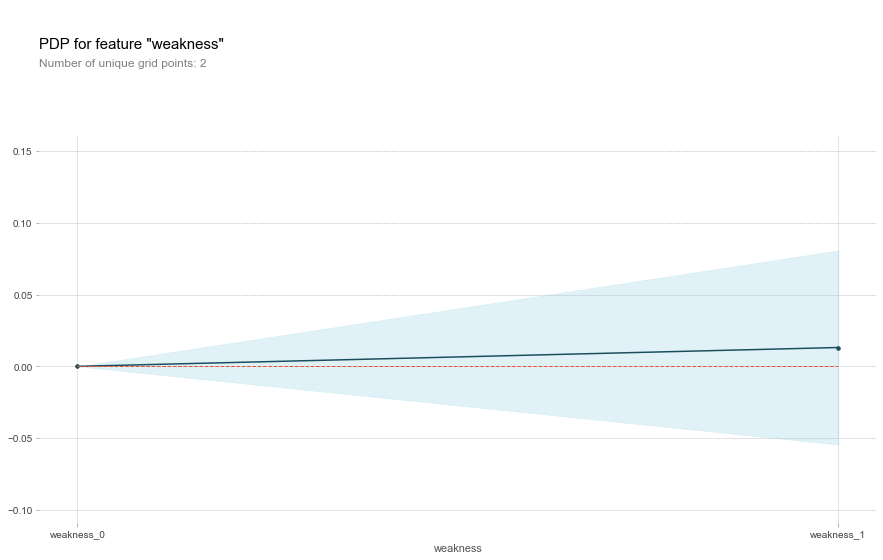

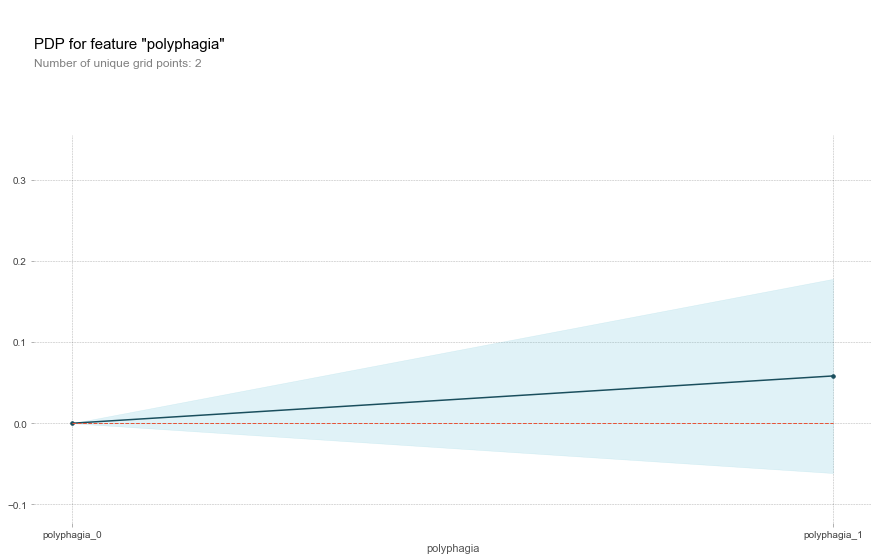

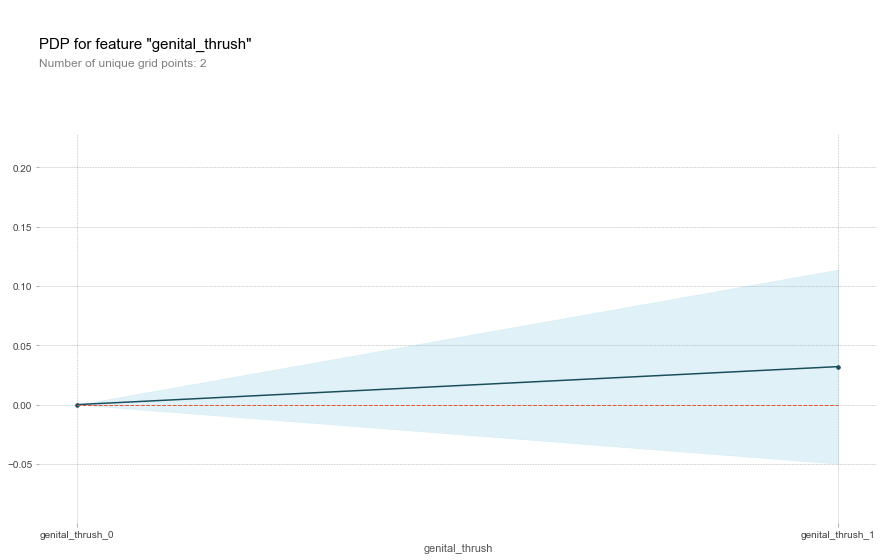

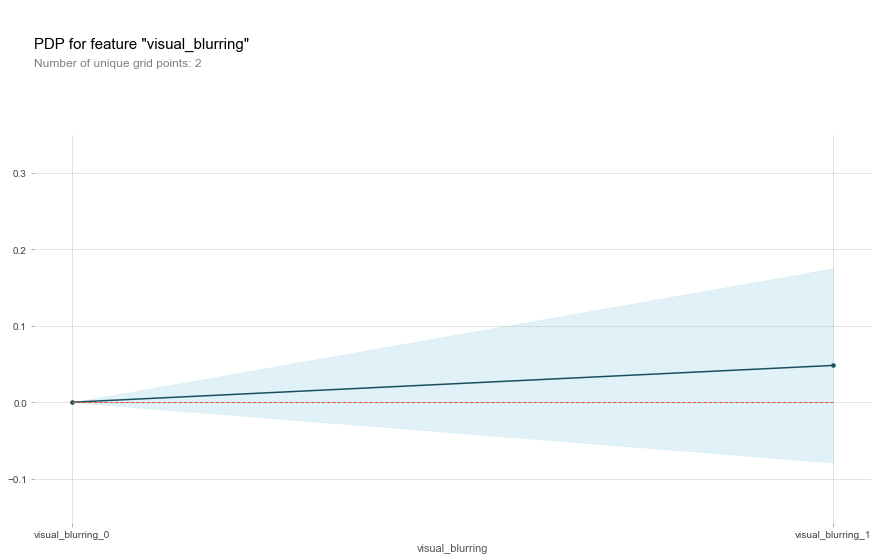

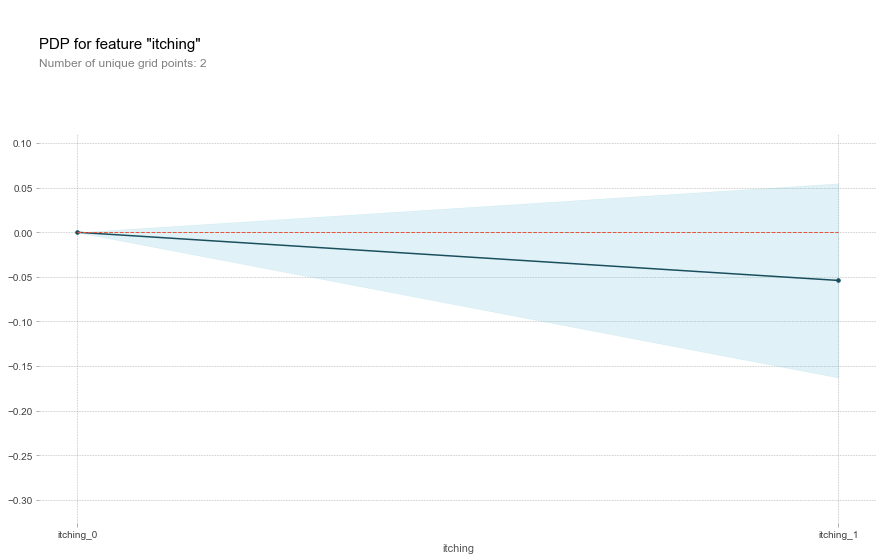

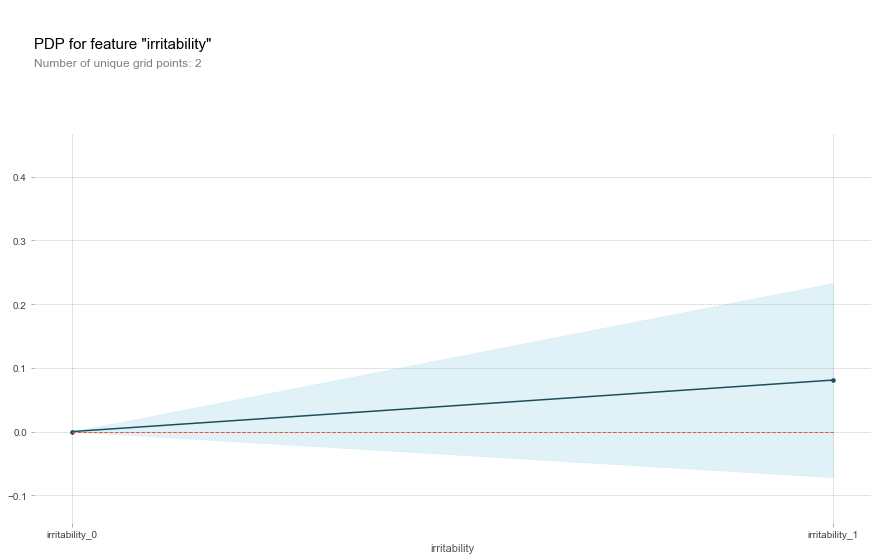

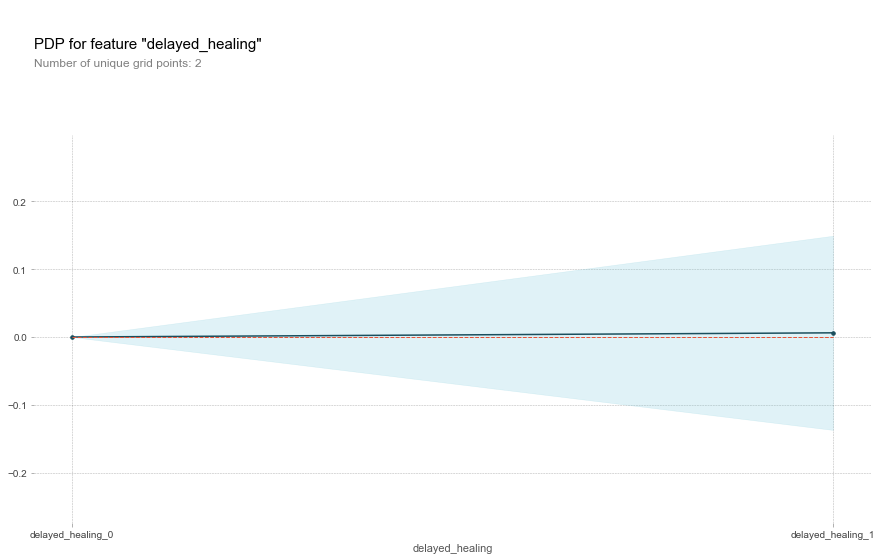

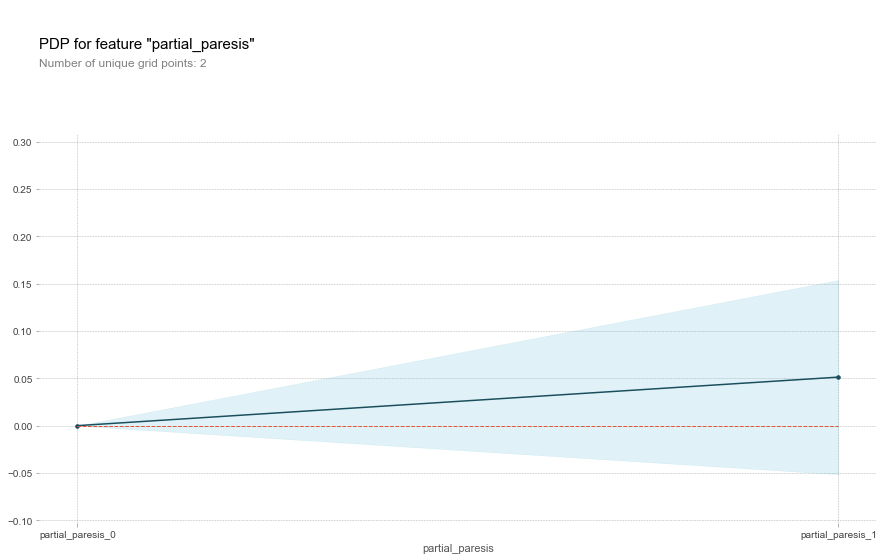

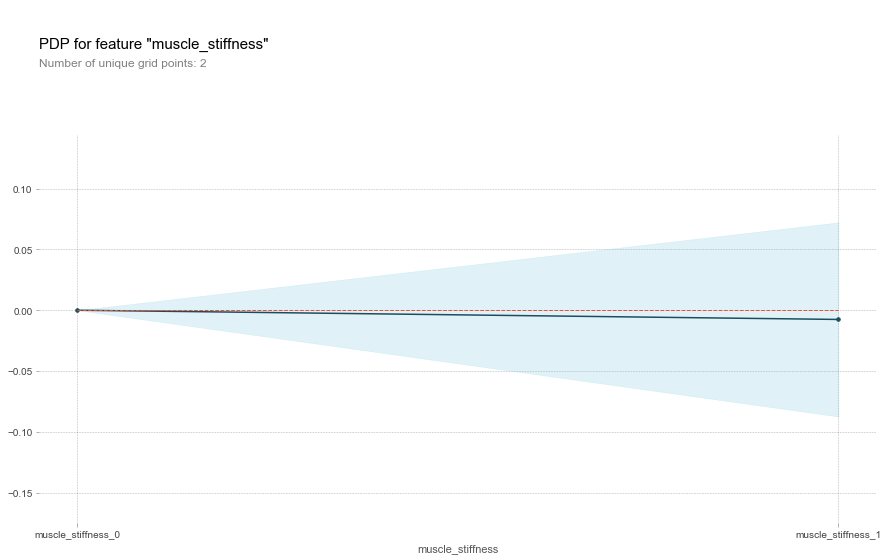

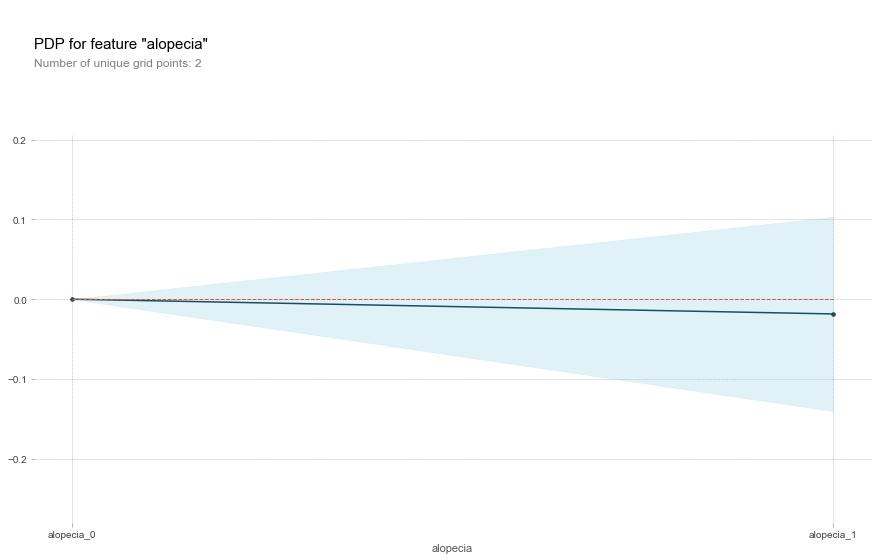

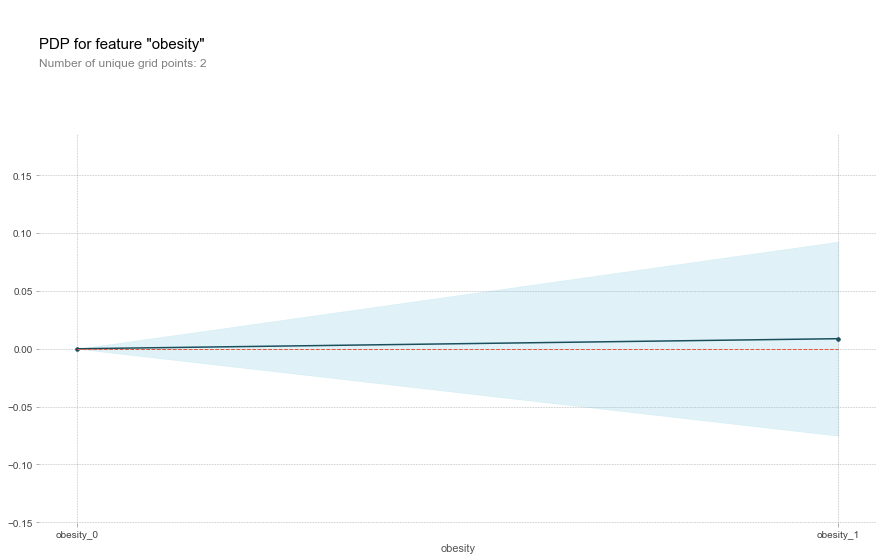

In [51]:
from pdpbox import pdp

featureset=df.columns.drop(["status"])
for column in featureset[:17]:
    feature=column
    isolate=pdp.pdp_isolate(
        model=rf,dataset=df,model_features=featureset,feature=feature
    )
    print(column)
    
    pdp_ageplot=pdp.pdp_plot(isolate,feature_name=feature,center=True,x_quantile=True, 
    ncols=3, frac_to_plot=100
    )